# Regression Modeling to Predict Student Enrollment

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import root_mean_squared_error

In [3]:
pd.set_option('display.max_column', None)

In [4]:
df = pd.read_csv('./data/cleaned_college.csv')

In [5]:
df.head()

,university,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,reject,perc_accept,perc_actually_came
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70.0,78,18.1,12,7041,60,428,74.22,58.52
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29.0,30,12.2,16,10527,56,262,88.01,26.61
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53.0,66,12.9,30,8735,54,331,76.82,30.63
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92.0,97,7.7,37,19016,59,68,83.69,39.26
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76.0,72,11.9,2,10922,15,47,75.65,37.67


In [6]:
df['private'] = df['private'].map({'Yes': 1, 'No': 0})

<Axes: >

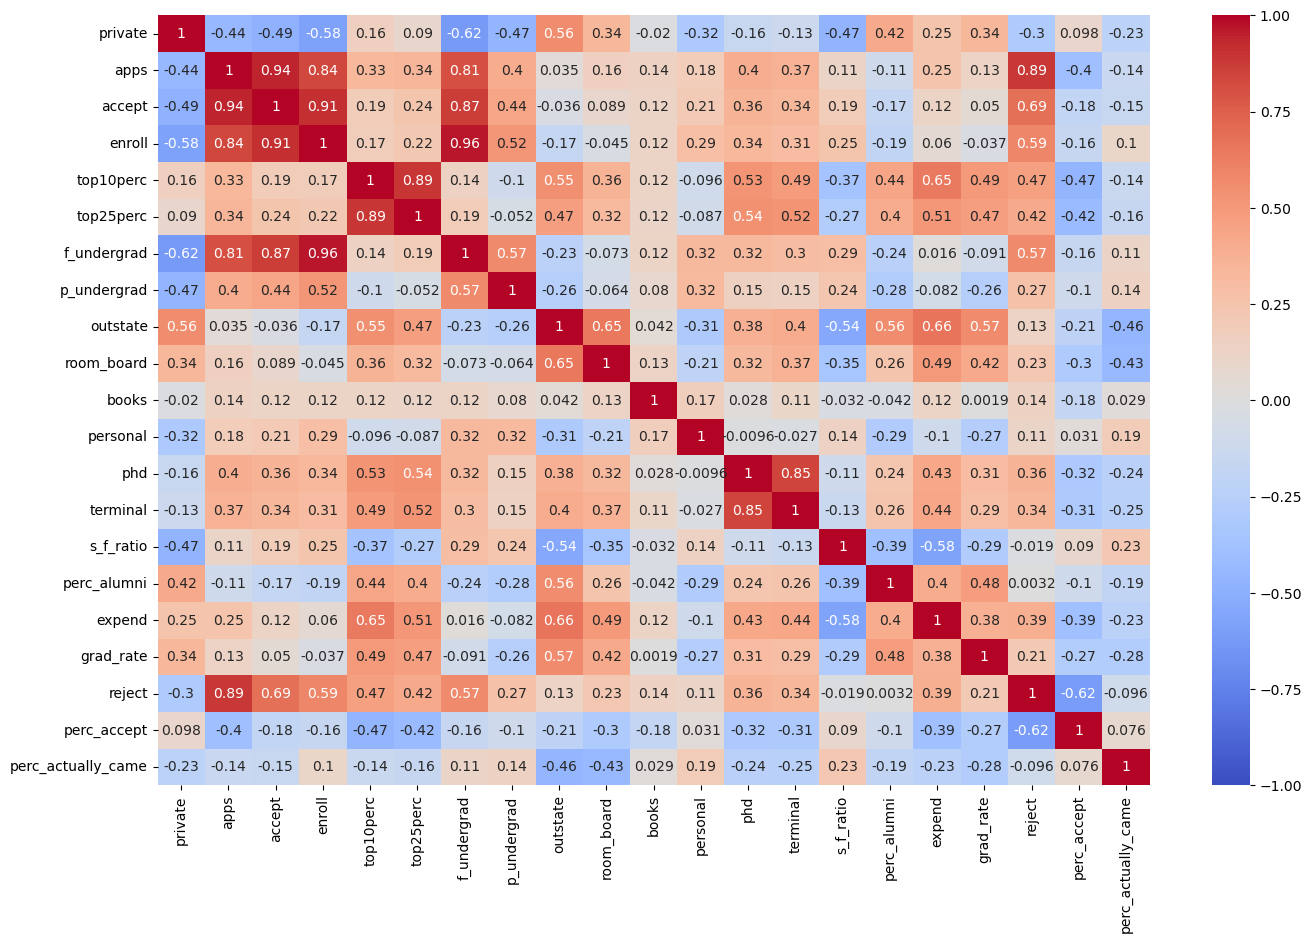

In [7]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True),
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)

In [8]:
df.head()

,university,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,reject,perc_accept,perc_actually_came
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70.0,78,18.1,12,7041,60,428,74.22,58.52
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29.0,30,12.2,16,10527,56,262,88.01,26.61
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53.0,66,12.9,30,8735,54,331,76.82,30.63
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92.0,97,7.7,37,19016,59,68,83.69,39.26
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76.0,72,11.9,2,10922,15,47,75.65,37.67


In [90]:
features = ['private', 'apps', 'accept', 
            'room_board', 'personal', 'phd', 
            's_f_ratio', 'outstate', 'grad_rate']

In [91]:
X = df[features]
y = df['enroll']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [93]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Linear Regression

In [94]:
lr = LinearRegression()

In [95]:
lr.fit(X_train, y_train)

LinearRegression()

In [96]:
lr.score(X_train, y_train)

0.8512000880655787

In [97]:
lr.score(X_test, y_test)

0.8762454902238132

In [98]:
lr_preds = lr.predict(X_test)

In [99]:
root_mean_squared_error(y_test, lr_preds)

354.4049060174903

In [100]:
baseline = np.full_like(y_test, y_test.mean())

In [101]:
root_mean_squared_error(y_test, baseline)

1007.4401536079472

### Random Forest

In [102]:
rf = RandomForestRegressor(random_state=42)

In [103]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [104]:
rf.score(X_train, y_train)

0.983245547075111

In [105]:
rf.score(X_test, y_test)

0.8742030493840709

In [106]:
rf_preds = rf.predict(X_test)

In [107]:
root_mean_squared_error(y_test, rf_preds)

357.31748207252946

### KNN

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
scaler = StandardScaler()

In [123]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
knn = KNeighborsRegressor()

In [125]:
param_grid = {'n_neighbors': np.arange(3, 31, 2), 
              'weights': ['uniform', 'distance'], 
              'metric': ['minkowski', 'manhattan']}

In [126]:
grid_knn = GridSearchCV(knn, param_grid, cv=kf)

In [127]:
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'weights': ['uniform', 'distance']})

In [128]:
grid_knn.best_score_

0.8627392493100888

In [129]:
grid_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [130]:
grid_knn.score(X_test_scaled, y_test)

0.8575463403347233

In [131]:
knn_preds = grid_knn.predict(X_test_scaled)

In [132]:
root_mean_squared_error(y_test, knn_preds)

380.23843475607447

Linear Regression performed the best, with a r2 score of 0.87, and an RMSE score of ~354

In [119]:
import pickle

In [133]:
with open('model.pkl', 'wb') as file:
    pickle.dump(lr, file)

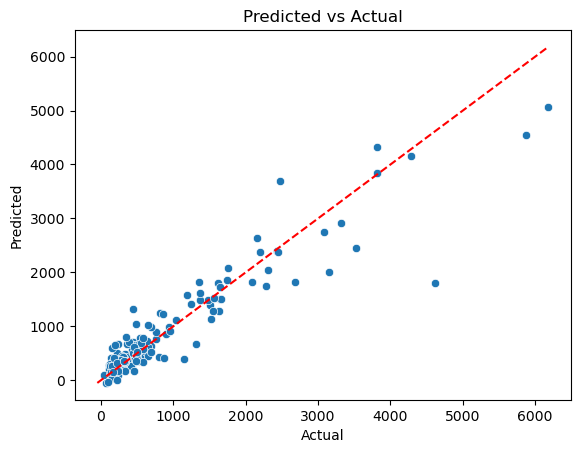

In [137]:
sns.scatterplot(x=y_test, y=lr_preds)

# Create line
min_val = min(y_test.min(), lr_preds.min())
max_val = max(y_test.max(), lr_preds.max())

plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

In [138]:
X_train.head()

,private,apps,accept,room_board,personal,phd,s_f_ratio,outstate,grad_rate
394,0,10634,7064,6540,1300,92.0,17.5,8400,62
327,1,4731,3171,5925,1200,74.0,17.6,10700,69
445,1,3712,2153,6140,500,63.0,12.0,12030,86
110,0,689,561,3689,1900,67.0,18.1,7168,46
82,1,1160,991,3880,930,74.0,17.8,12200,79


In [139]:
y_train.head()

394    3176
327     830
445     806
110     250
82      352
Name: enroll, dtype: int64